# Metodo Interpolación


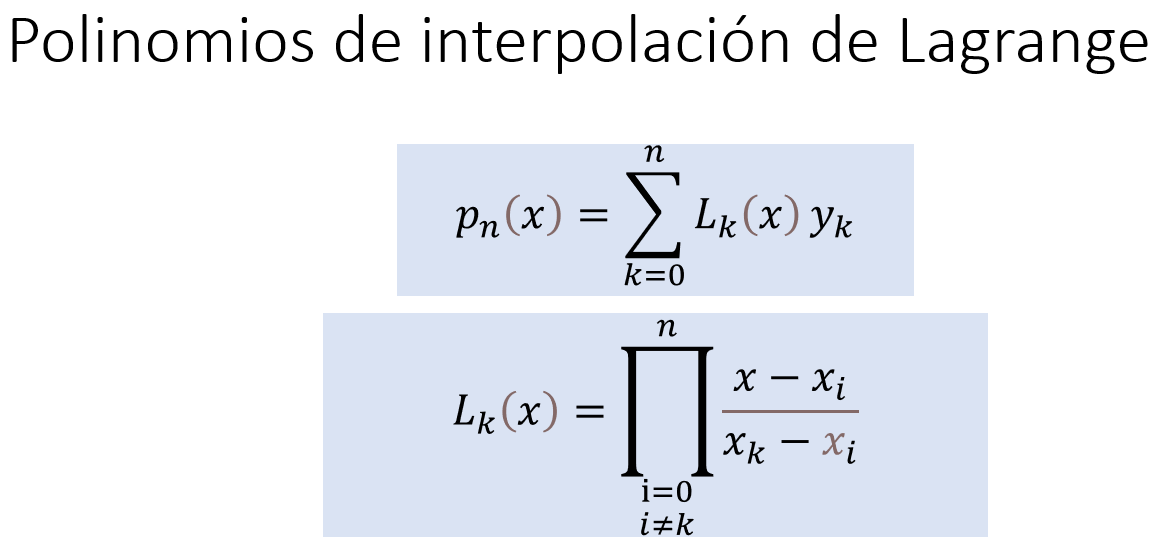

In [2]:
#LIBRERÍAS
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
x = sp.symbols('x')

## Gráficos de puntos y funciónes

In [ ]:

x1 =np.linspace(0,10,2)

y1 = 3*x1+4

plt.scatter(x1, y1, marker='^');


In [ ]:

x1 =np.linspace(0,10,2)

y1 = 3*x1+4

plt.scatter(x1, y1, marker='^');
plt.plot(x1, y1, 'r');

In [ ]:

x2 =np.linspace(-10,10,3)

y2 = x2**2  +2

plt.scatter(x2, y2, marker='^');

plt.show()

In [ ]:
x2 =np.linspace(-10,10,3)
x3 =np.linspace(-10,10,5)
x4 =np.linspace(-10,10,416)
y2 = x2**2  +2

plt.scatter(x2, y2, marker='^');
plt.plot(x2, y2, 'r');
#plt.plot(x3, (x3**2+2), 'b');
plt.plot(x4, (x4**2+2), 'g');

plt.scatter(5, 27.3, s=35);

plt.show()

In [ ]:
x1 =np.linspace(0,10,2)

y1 = 3*x1+4

plt.scatter(x1, y1, marker='^');
plt.plot(x1, y1, 'r');
plt.xticks([])
plt.yticks([])

## Ejercicios Polinomios de Lagrange

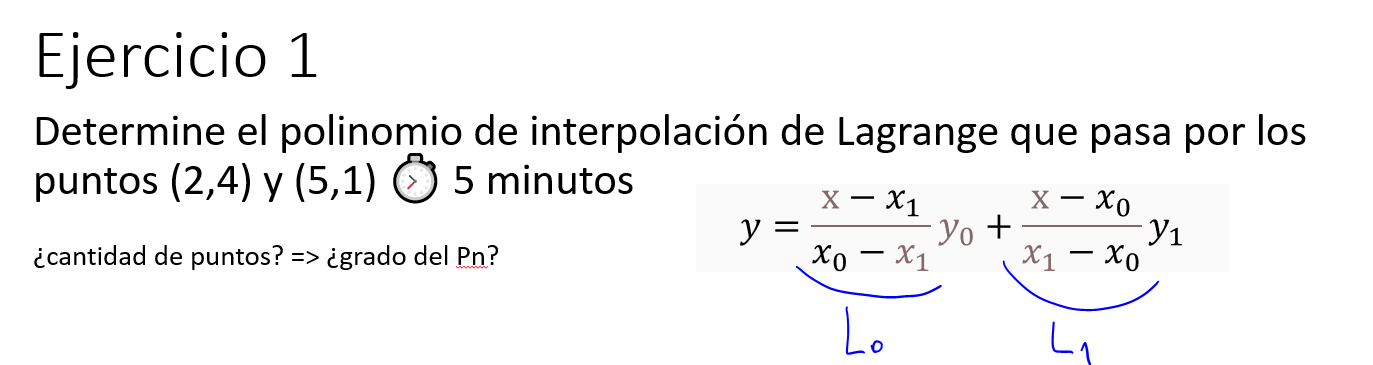

Reemplazamos los valores de x0,y0,x1,y1 en la ecuación y luego simplificamos:

In [ ]:
((x-5)/(2-5))*4+((x-2)/(5-2))*1

6 - x

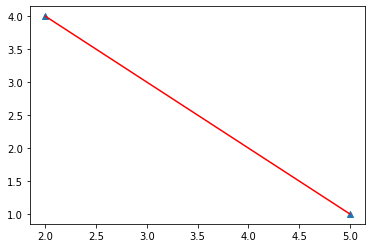

In [ ]:
x =np.linspace(2,5,2) #se grafica en x de 2 a 5, colocando 2 puntos.

y = -x+6  # obtenida en el paso anterior

plt.scatter(x, y, marker='^');  #Muestra los 2 puntos
plt.plot(x, y, 'r');  #Muestra la recta color rojo

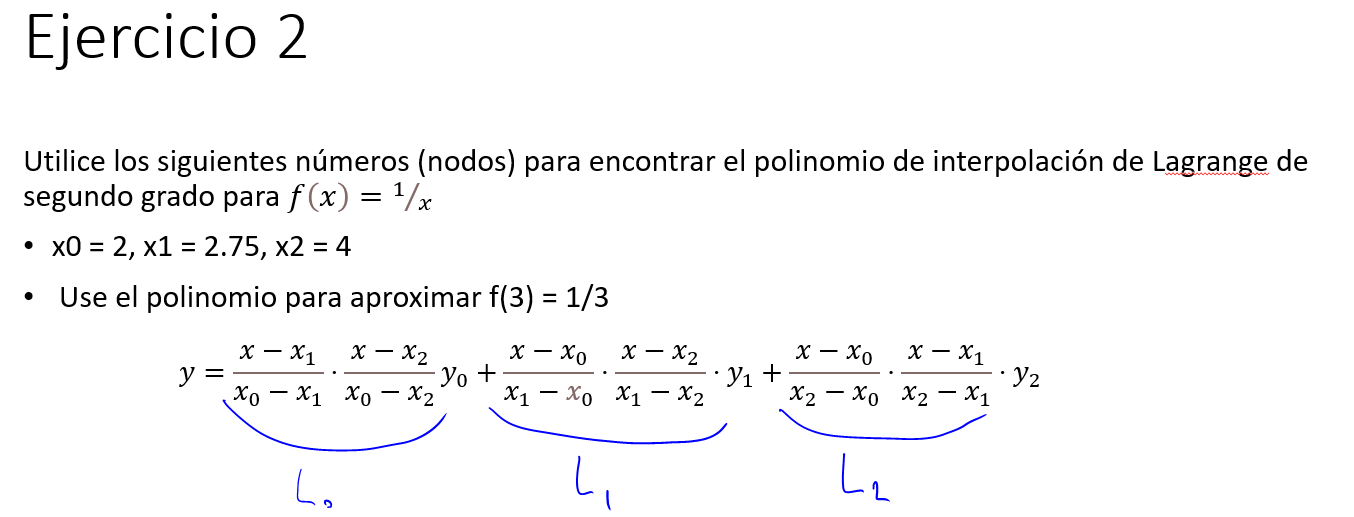

### Definimos parámetros

In [ ]:
#import sympy as sp
#x = sp.symbols('x')

f = 1/x

x0 = 2
x1 = 2.75
x2 = 4


### Calculamos los Lk(x)

In [ ]:
L0 = ((x-x1)*(x-x2))/((x0-x1)*(x0-x2)) # La escritura con la division en el medio facilita pasos más adelante
#L0 = (((x-x1)/(x0-x1))*((x-x2)/(x0-x2)))
L0

0.666666666666667*(x - 4)*(x - 2.75)

In [ ]:
L1 = ((x-x0)*(x-x2))/((x1-x0)*(x1-x2))
# L1 = (((x-x0)/(x1-x0))*((x-x2)/(x1-x2)))
L1

-1.06666666666667*(x - 4)*(x - 2)

In [ ]:
L2 = ((x-x0)*(x-x1))/((x2-x0)*(x2-x1))
#L2 = (((x-x0)/(x2-x0))*((x-x1)/(x2-x1)))
L2

0.4*(x - 2.75)*(x - 2)

### Obtener los yk

In [ ]:
#Evaluar f en los x dados
y0 = f.subs(x,x0)
y1 = f.subs(x,x1)
y2 = f.subs(x,x2)

### Obtenemos p(x) mediante la sumatoria de los Lk*yk


In [ ]:
#Multiplicamos los Lk por yk y sumamos

L0*y0 + L1*y1+L2*y2

0.333333333333333*(x - 4)*(x - 2.75) - 0.387878787878788*(x - 4)*(x - 2) + 0.1*(x - 2.75)*(x - 2)

In [ ]:
pn = L0*y0 + L1*y1+L2*y2
sp.simplify(pn)

0.0454545454545455*x**2 - 0.397727272727273*x + 1.11363636363636

### Aproximamos f(3)
Sabemos que f(3)=1/3 porque conocemos la función original f(x)=1/x.
Vamos a probar qué tan bien aproxima nuestro polinomio a este valor

In [ ]:
pn.subs(x,3)

0.329545454545455

In [ ]:
# Veamos el error respecto a la función original:
abs(f.subs(x,3)-pn.subs(x,3))

0.00378787878787878

### Graficamos

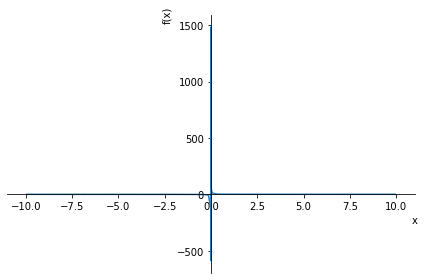

In [ ]:
#Graficamos f(x)
sp.plot(f);

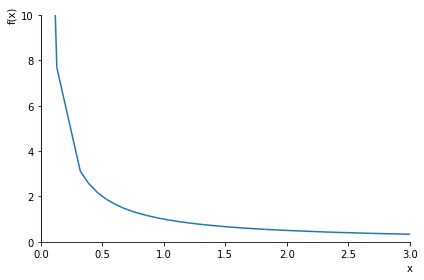

In [ ]:
# Graficamos estableciendo límites para visualizar mejor la función

sp.plot(f,xlim=[0,3], ylim=[0,10]);
# ";" sirve para que no se imprima una frase de sympy debajo del gráfico
# La función no está definida en 0 (hay una indeterminación) pero cuando x->0 la función tiende a infinito

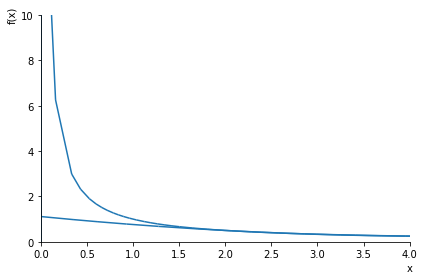

In [ ]:
# Graficamos la función f(x) junto al polinomio obtenido 

sp.plot(f,pn, xlim=[0,4], ylim=[0,10]);

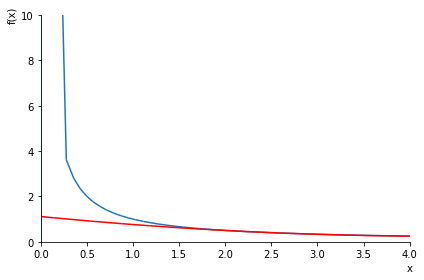

In [ ]:
# Cambiamos el color de la recta pn

p = sp.plot(f,pn, xlim=[0,4], ylim=[0,10], show=False);   #Guardamos el plot anterior en una variable llamada "p" y evitamos que la imprima 
p[1].line_color= 'r'  #La posición 1 de la variable p es pn, y le cambiamos el color

p.show()

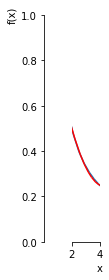

In [ ]:
p = sp.plot(f,pn, xlim=[2,4], ylim=[0,1], show=False);   #Guardamos el plot anterior en una variable llamada "p" y evitamos que la imprima 
p[1].line_color= 'r'  #La posición 1 de la variable p es pn, y le cambiamos el color

p.show()

Vemos lo que mencionamos anteriormente, en cuanto a la capacidad de aproximacioón de nuestro polinomio. Puedo hacer estimaciones confiables solo entre los puntos que tenía inicialmente (x0,xn) en este caso entre 2 y 4. Fuera de ese rango no puedo asegurar una aproximación cercana

## Pensamos Algoritmo

### Caso Grado 1


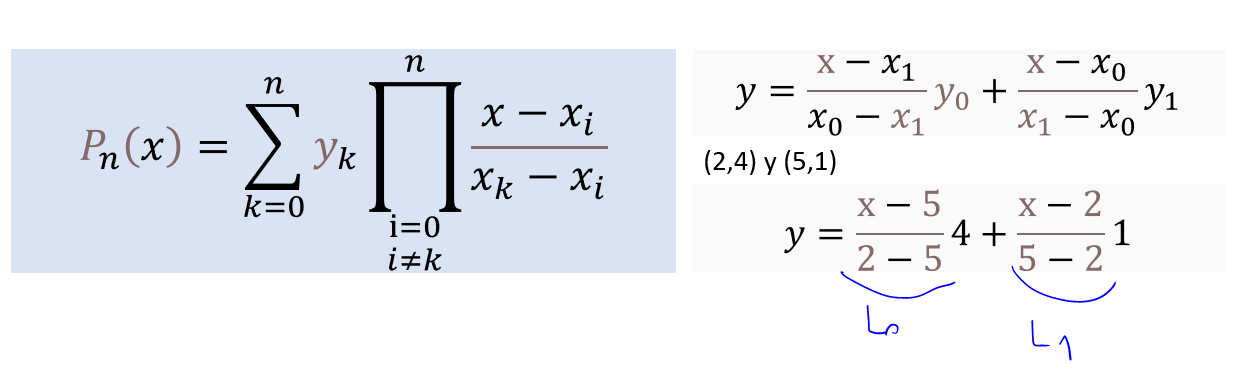

### Caso Ejercicio 2
Tratamos de ensamblar los pasos del Ej 2 en un ciclo for para obtener pn (cuadratica, grado 2). Intentamos replicar la ecuacion de pn a partir de lo que ya tenemos

In [ ]:
#Creamos las siguientes listas:
Lk = [L0,L1,L2]
Yk = [y0,y1,y2]
Pn = 0

In [ ]:
for k in range(3):
  print(Lk[k]*Yk[k])
# Me devuelve los valores que luego debo sumar  

0.333333333333333*(x - 4)*(x - 2.75)
-0.387878787878788*(x - 4)*(x - 2)
0.1*(x - 2.75)*(x - 2)


In [ ]:
for k in range(3):
  Pn = Lk[k]*Yk[k] + Pn

In [ ]:
Pn.simplify()

0.0454545454545455*x**2 - 0.397727272727273*x + 1.11363636363636

## Empezar a generar la ecuación - GRADO 1



In [3]:
puntos_x= [2,5]
puntos_y= [4,1]
Ln = []

for k in range(2):
  for i in range(2):
    if i != k:
      print(x-puntos_x[i])
      print("-------")    #Simula ser la linea de división (/)
      print(puntos_x[k]-puntos_x[i])
      Ln.append((x-puntos_x[i])/(puntos_x[k]-puntos_x[i]))
  print("============")   #Esta linea separa cada término, !!! le falta el "y" multiplicando.
    # tenemos que conseguir guardar cada nuevo término generado (opción:append)

x - 5
-------
-3
x - 2
-------
3


In [ ]:
print(Ln[0])  #Esto es el primer término completo (posición 0)

20/3 - 4*x/3


In [ ]:
Ln[0]*puntos_y[0] #Esto es el primer término completo (posición 0)

20/3 - 4*x/3

In [ ]:
Ln[0]*puntos_y[0]+Ln[1]*puntos_y[1]

6 - x

# Polinomio para Grado 1


In [6]:
x = sp.symbols('x')
#Incluimos en un ciclo for la línea de código anterior para que haga la suma automáticamente
puntos_x= [2,5]
puntos_y= [4,1]
Lny = []    #Variable que va a contener los términos de la sumatoria
pn=0

for k in range(2):
  for i in range(2):
    if i != k:
      Lny.append(((x-puntos_x[i])/(puntos_x[k]-puntos_x[i]))*puntos_y[k])
      pn= pn+Lny[k]

pn

6 - x

# Polinomio para Grado N


In [9]:
x = sp.symbols('x')

puntos_x= [2,2.75,4] 
puntos_y= [0.5,0.364,0.25]
pn=0

for k in range(len(puntos_x)):  #La cantidad de ciclos depende de la cantidad de puntos
  Ln=1 
  for i in range(len(puntos_x)):
    if i != k:
      factor= (x-puntos_x[i])/(puntos_x[k]-puntos_x[i])
      Ln=Ln*factor
      
  pn= pn+ (Ln*puntos_y[k])

pn = sp.simplify(pn)
Pn

0.0454545454545455*x**2 - 0.397727272727272*x + 1.11363636363636